In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.patches as mpatches
import matplotlib

ImportError: DLL load failed while importing _imaging: Das angegebene Modul wurde nicht gefunden.

# Analyse Dataset

## Import and prepare the FAO Aquastat dataset
The `csv` is too big for overleaf so you can find it here:
https://yaon.org/data.csv

In [1]:
from src.utils import get_dataframe

FILE_NAME = 'dat/fao_aquastat.csv'
CSV_URL = 'https://yaon.org/data.csv'

'''
Import CSV. This also downloads the file if it is not already present.
'''
import_df = get_dataframe(file_name=FILE_NAME, url=CSV_URL)
if import_df is None:
    print('Could not import CSV')
    exit(1)

'''Drop first column'''
import_df.drop(columns=['Unnamed: 0'], inplace=True)

'''Format dataframe'''
df = import_df.pivot_table(index=['Country', 'Year'], columns='Variable', values='Value', aggfunc='first')
df.reset_index(inplace=True)

df.head()

dat/fao_aquastat.csv already exists.


Variable,Country,Year,% of agricultural GVA produced by irrigated agriculture,% of agricultural water managed area equipped for irrigation,% of area equipped for full control irrigation actually irrigated,% of area equipped for irrigation by desalinated water,% of area equipped for irrigation by direct use of treated municipal wastewater,% of area equipped for irrigation by direct use of agricultural drainage water,% of area equipped for irrigation by direct use of non-treated municipal wastewater,% of area equipped for irrigation by groundwater,...,Total water withdrawal,Total water withdrawal per capita,Treated municipal wastewater,Treated municipal wastewater discharged (secondary water),Urban population,Urban population with access to safe drinking-water (JMP),Water resources: total external renewable,Water withdrawal for aquaculture,Water withdrawal for cooling of thermoelectric plants,Water withdrawal for livestock (watering and cleaning)
0,Afghanistan,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,932.865,NaN,18.18,NaN,NaN,NaN
1,Afghanistan,1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,984.350,NaN,18.18,NaN,NaN,NaN
2,Afghanistan,1966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1038.852,NaN,18.18,NaN,NaN,NaN
3,Afghanistan,1967,NaN,100.0,NaN,NaN,NaN,NaN,NaN,15.399632,...,NaN,NaN,NaN,NaN,1096.428,NaN,18.18,NaN,NaN,NaN
4,Afghanistan,1968,NaN,100.0,NaN,NaN,NaN,NaN,NaN,15.461053,...,NaN,NaN,NaN,NaN,1157.827,NaN,18.18,NaN,NaN,NaN


## Find for us relevant variables
The following list contains all availible variables in the Dataset:

In [4]:
all_vars = df.columns
for var in all_vars:
    print(var)

Country
Year
% of agricultural GVA produced by irrigated agriculture
% of agricultural water managed area equipped for irrigation
% of area equipped for full control irrigation actually irrigated
% of area equipped for irrigation by desalinated water
% of area equipped for irrigation by direct use of  treated municipal wastewater
% of area equipped for irrigation by direct use of agricultural drainage water 
% of area equipped for irrigation by direct use of non-treated municipal wastewater
% of area equipped for irrigation by groundwater 
% of area equipped for irrigation by mixed surface water and groundwater
% of area equipped for irrigation by surface water
% of area equipped for irrigation drained
% of area equipped for irrigation power irrigated
% of area equipped for irrigation salinized
% of irrigation potential equipped for irrigation
% of the agricultural holdings with irrigation managed by women
% of the area equipped for irrigation actually irrigated
% of the area equipped 

Now we should define which variables and (maybe not yet) countries we want to look at. Please define those in the following code:

In [5]:
'''relevant variables for us'''
relevant_vars = ['Total water withdrawal',
                 'Agricultural water withdrawal',

                 ]
'''filter countries (no filter if empty)'''
filter_countries = []

## Analyse useabla Data
LIEGT JETZT IN EIGENEM NOTEBOOK

## PCA


In [9]:
# Assuming df is your original dataframe
# Step 1: Filter for Uruguay
uruguay_data = df[df['Country'] == 'Uruguay']

# Step 2: Set 'Year' as index
uruguay_data = uruguay_data.set_index('Year')

# Step 3: Drop the 'Country' column as it's no longer needed
uruguay_data = uruguay_data.drop(columns=['Country'])

# Show the reshaped dataframe
print(uruguay_data)

Variable  % of agricultural GVA produced by irrigated agriculture  \
Year                                                                
1964                                                    NaN         
1965                                                    NaN         
1966                                                    NaN         
1967                                                    NaN         
1968                                                    NaN         
1969                                                    NaN         
1970                                                    NaN         
1971                                                    NaN         
1972                                                    NaN         
1973                                                    NaN         
1974                                                    NaN         
1975                                                    NaN         
1976                              

In [10]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA

pca_vars = ['% of agricultural GVA produced by irrigated agriculture',
            '% of agricultural water managed area equipped for irrigation',
            '% of the agricultural holdings with irrigation managed by women',
            '% of the cultivated area equipped for irrigation', '% of total country area cultivated',
            '% of total cultivated area drained', '% of total grain production irrigated',
            'Agricultural water withdrawal', 'Agricultural water withdrawal as % of total renewable water resources',
            'Agricultural water withdrawal as % of total water withdrawal', 'Agriculture, value added (% GDP)',
            'Agriculture, value added to GDP', 'Arable land area',
            'Area equipped for irrigation by direct use of agricultural drainage water',
            'Cultivated area (arable land + permanent crops)', 'Direct use of agricultural drainage water',
            'Harvested irrigated permanent crop area: Bananas', 'Harvested irrigated permanent crop area: Citrus',
            'Harvested irrigated permanent crop area: Cocoa beans', 'Harvested irrigated permanent crop area: Coconuts',
            'Harvested irrigated permanent crop area: Coffee', 'Harvested irrigated permanent crop area: Grapes',
            'Harvested irrigated permanent crop area: Grass and Fodder',
            'Harvested irrigated permanent crop area: Oil palm', 'Harvested irrigated permanent crop area: Olives',
            'Harvested irrigated permanent crop area: Other crops',
            'Harvested irrigated permanent crop area: Other fruits',
            'Harvested irrigated permanent crop area: Plantains', 'Harvested irrigated permanent crop area: Rubber',
            'Harvested irrigated permanent crop area: Tea', 'Harvested irrigated permanent crop area: Total',
            'Harvested irrigated temporary crop area: Barley', 'Harvested irrigated temporary crop area: Cassava',
            'Harvested irrigated temporary crop area: Cotton', 'Harvested irrigated temporary crop area: Flowers',
            'Harvested irrigated temporary crop area: Fodder', 'Harvested irrigated temporary crop area: Groundnuts',
            'Harvested irrigated temporary crop area: Leguminous crops',
            'Harvested irrigated temporary crop area: Maize', 'Harvested irrigated temporary crop area: Millet',
            'Harvested irrigated temporary crop area: Other cereals',
            'Harvested irrigated temporary crop area: Other crops',
            'Harvested irrigated temporary crop area: Other roots and tubers',
            'Harvested irrigated temporary crop area: Potatoes', 'Harvested irrigated temporary crop area: Rice',
            'Harvested irrigated temporary crop area: Sesame', 'Harvested irrigated temporary crop area: Sorghum',
            'Harvested irrigated temporary crop area: Soybeans', 'Harvested irrigated temporary crop area: Sugar beet',
            'Harvested irrigated temporary crop area: Sugarcane', 'Harvested irrigated temporary crop area: Sunflower',
            'Harvested irrigated temporary crop area: Sweet potatoes',
            'Harvested irrigated temporary crop area: Tobacco', 'Harvested irrigated temporary crop area: Total',
            'Harvested irrigated temporary crop area: Vegetables', 'Harvested irrigated temporary crop area: Wheat',
            'Irrigated cropping intensity', 'Non-irrigated cultivated area drained', 'Permanent crops area',
            'SDG 6.4.1. Irrigated Agriculture Water Use Efficiency', 'Total agricultural water managed area',
            'Total cultivated area drained', 'Total harvested irrigated crop area (full control irrigation)',
            'Water withdrawal for cooling of thermoelectric plants',
            'Water withdrawal for livestock (watering and cleaning)'
            ]
# Filter the data for these variables
country_data = uruguay_data[pca_vars]
non_constant_columns = country_data.columns[country_data.nunique() > 1]
country_data = country_data[non_constant_columns]

from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(country_data)

# Proceed with scaling and PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)

# PCA
components = 5
pca = PCA(n_components=components)
principal_components = pca.fit_transform(scaled_data)

# Create DataFrame for PCA results
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, components + 1)])

# Add the 'Year' column back
principal_df['Year'] = country_data.index

# Print the head of the PCA DataFrame
print(principal_df.head())

# Print explained variance ratio
print(f'PCA Explained Variance Ratio: {pca.explained_variance_ratio_}')



        PC1       PC2       PC3       PC4       PC5  Year
0 -0.948993 -0.857130  0.002836  2.278223 -0.247682  1964
1 -0.790240 -4.254437  0.714411  2.969309 -0.652173  1965
2 -0.705475 -3.830166  0.644121  2.614928 -0.570453  1966
3 -0.587635 -3.542018  0.563821  2.241077 -0.516724  1967
4 -0.469911 -3.292111  0.491806  1.888196 -0.470828  1968
PCA Explained Variance Ratio: [0.47069255 0.16785129 0.13427706 0.07975881 0.03963975]


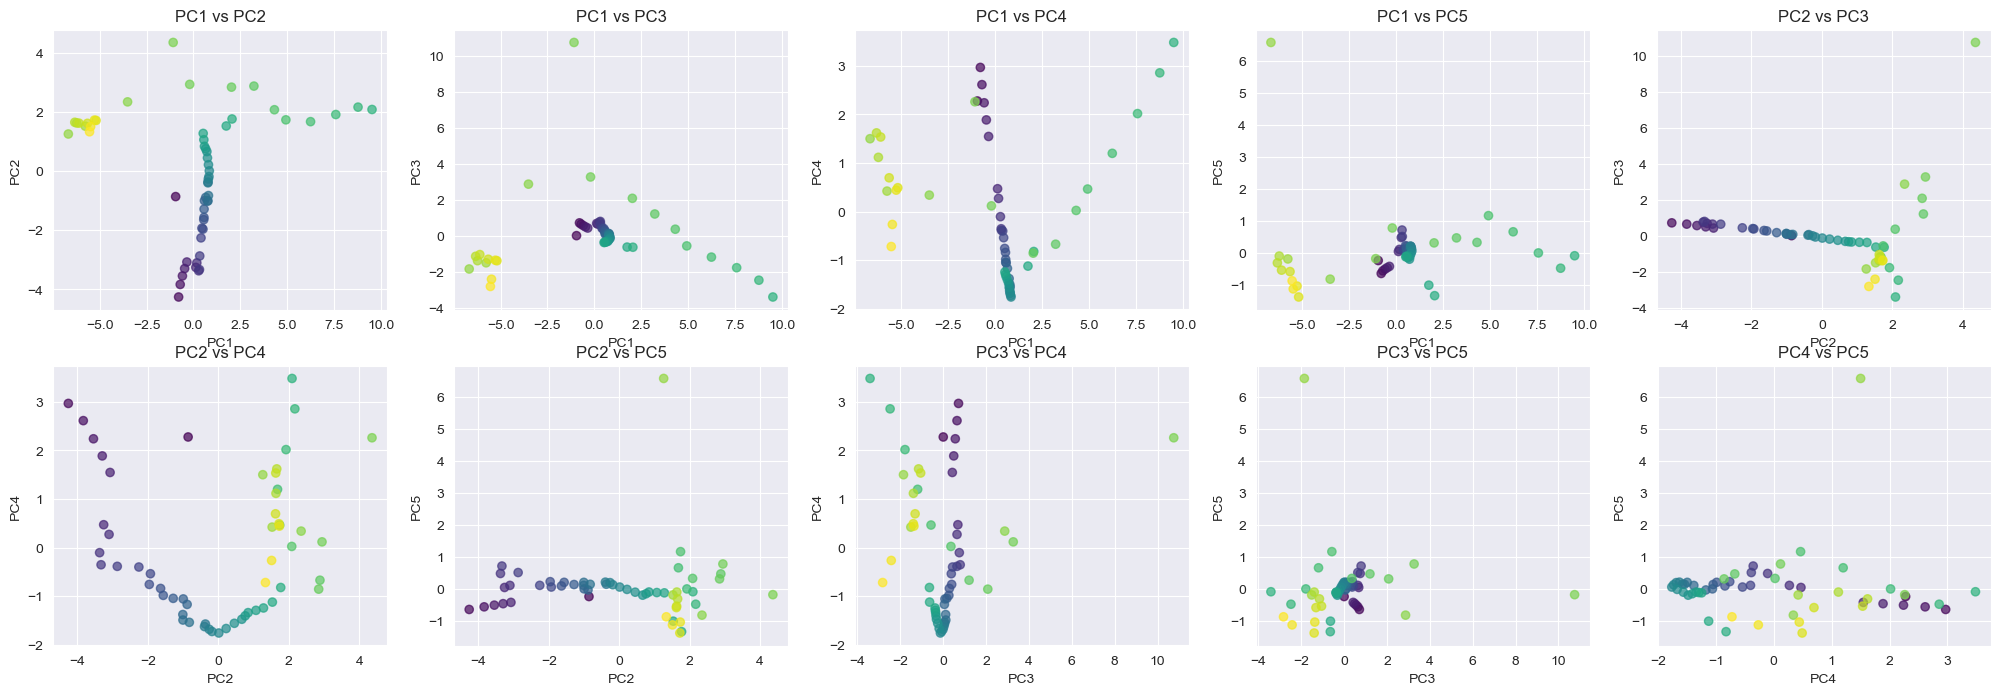

In [36]:
from math import ceil
import itertools

# Assuming principal_df is your DataFrame with PCA results and 'Year' column
# Plot the first two principal components
combinations_of_two = list(itertools.combinations(range(1, components + 1), 2))
# Number of subplots (equals the number of combinations)
num_plots = len(combinations_of_two)

# Number of plots per row
plots_per_row = 5

# Number of rows needed
num_rows = ceil(num_plots / plots_per_row)
fig, axs = plt.subplots(num_rows, plots_per_row, figsize=(plots_per_row * 5, num_rows * 4))
axs = axs.flatten()
for i, (x, y) in enumerate(combinations_of_two):
    axs[i].scatter(principal_df[f'PC{x}'], principal_df[f'PC{y}'], alpha=0.7, c=principal_df['Year'], cmap='viridis')
    axs[i].set_xlabel(f'PC{x}')
    axs[i].set_ylabel(f'PC{y}')
    axs[i].set_title(f'PC{x} vs PC{y}')

# Show the plot
plt.show()

In [14]:
# Assuming 'scaled_data' is the data used for PCA
# If 'pca_vars' was used to select these columns, ensure it has the correct columns
pca_vars = country_data.columns  # This should reflect the exact columns used in PCA

# Now create the DataFrame for loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, components + 1)], index=pca_vars)

# Display the loadings
loadings

,PC1,PC2,PC3,PC4,PC5
Variable,,,,,
% of agricultural GVA produced by irrigated agriculture,0.224511,-0.024935,-0.260035,0.116425,-0.071923
% of agricultural water managed area equipped for irrigation,-0.067771,-0.022911,-0.060998,0.052218,0.864731
% of the cultivated area equipped for irrigation,0.165982,-0.024611,-0.230707,-0.128322,-0.117929
% of total country area cultivated,-0.210626,-0.013647,0.034284,0.457037,-0.014676
Agricultural water withdrawal,-0.016759,0.465962,-0.098519,-0.016780,0.024897
Agricultural water withdrawal as % of total renewable water resources,-0.016759,0.465962,-0.098519,-0.016780,0.024897
Agricultural water withdrawal as % of total water withdrawal,-0.001276,-0.418682,0.090692,0.229591,-0.085765
"Agriculture, value added (% GDP)",0.029821,-0.339199,0.119643,-0.142725,0.268462
"Agriculture, value added to GDP",-0.208261,0.242429,-0.098179,0.249504,0.007046


## How can we answer our questions and which variables could help

### 1. What is the prevailing global trend in terms of water utilization within the agricultural sector and what factors contribute to these changes?

#### Steps

1. Find variables about agricultural water utilization:
    - it can be useful to use PCA to reduce the amount of variables (see down below) that we want to analyze
2. Since we may have a lot of factors that co-influence the agricultural water utilization (climate, population, demand, etc.) we could use a script to try and find correlations between the factors

#### Variables about Agricultural water utilization (from FAO AQUASTAT)

- % of agricultural GVA produced by irrigated agriculture
- % of agricultural water managed area equipped for irrigation
- % of area equipped for irrigation by direct use of treated municipal wastewater
- % of area equipped for irrigation by direct use of agricultural drainage water 
- % of the agricultural holdings with irrigation managed by women
- % of the cultivated area equipped for irrigation
- % of total country area cultivated
- % of total cultivated area drained
- % of total grain production irrigated
- Agricultural water withdrawal
- Agricultural water withdrawal as % of total renewable water resources
- Agricultural water withdrawal as % of total water withdrawal
- Agriculture, value added (% GDP)
- Agriculture, value added to GDP
- Arable land area
- Area equipped for irrigation by direct use of agricultural drainage water
- Cultivated area (arable land + permanent crops)
- Direct use of agricultural drainage water
- Harvested irrigated permanent crop area: Bananas
- Harvested irrigated permanent crop area: Citrus
- Harvested irrigated permanent crop area: Cocoa beans
- Harvested irrigated permanent crop area: Coconuts
- Harvested irrigated permanent crop area: Coffee
- Harvested irrigated permanent crop area: Grapes
- Harvested irrigated permanent crop area: Grass and Fodder
- Harvested irrigated permanent crop area: Oil palm
- Harvested irrigated permanent crop area: Olives
- Harvested irrigated permanent crop area: Other crops
- Harvested irrigated permanent crop area: Other fruits
- Harvested irrigated permanent crop area: Plantains
- Harvested irrigated permanent crop area: Rubber
- Harvested irrigated permanent crop area: Tea
- Harvested irrigated permanent crop area: Total
- Harvested irrigated temporary crop area: Barley
- Harvested irrigated temporary crop area: Cassava
- Harvested irrigated temporary crop area: Cotton
- Harvested irrigated temporary crop area: Flowers
- Harvested irrigated temporary crop area: Fodder
- Harvested irrigated temporary crop area: Groundnuts
- Harvested irrigated temporary crop area: Leguminous crops
- Harvested irrigated temporary crop area: Maize
- Harvested irrigated temporary crop area: Millet
- Harvested irrigated temporary crop area: Other cereals
- Harvested irrigated temporary crop area: Other crops
- Harvested irrigated temporary crop area: Other roots and tubers
- Harvested irrigated temporary crop area: Potatoes
- Harvested irrigated temporary crop area: Rice
- Harvested irrigated temporary crop area: Sesame
- Harvested irrigated temporary crop area: Sorghum
- Harvested irrigated temporary crop area: Soybeans
- Harvested irrigated temporary crop area: Sugar beet
- Harvested irrigated temporary crop area: Sugarcane
- Harvested irrigated temporary crop area: Sunflower
- Harvested irrigated temporary crop area: Sweet potatoes
- Harvested irrigated temporary crop area: Tobacco
- Harvested irrigated temporary crop area: Total
- Harvested irrigated temporary crop area: Vegetables
- Harvested irrigated temporary crop area: Wheat
- Irrigated cropping intensity
- Non-irrigated cultivated area drained
- Permanent crops area
- SDG 6.4.1. Irrigated Agriculture Water Use Efficiency
- Total agricultural water managed area
- Total cultivated area drained
- Total harvested irrigated crop area (full control irrigation)
- (Water withdrawal for aquaculture)
- Water withdrawal for cooling of thermoelectric plants
- Water withdrawal for livestock (watering and cleaning)

#### Factors that influence agriculture water utilization

- Climate Conditions:
    - Source: <https://gcos.wmo.int/en/essential-climate-variables/table>
    - Variables:
        - Atmosphere
            - Precipitation
            - Pressure 
            - Radiation budget
            - Temperature 
            - Water vapour 
            - Wind speed and direction 
            
            - Earth radiation budget 
            - Lightning 
            - Temperature 
            - Water vapor 
            - Wind speed and direction 
            - Clouds 
            
            - Aerosols 
            - Carbon dioxide, methane and other greenhouse gases 
            - Ozone 
            - Precursors for aerosols and ozone 
        
        - Land:
            - Groundwater 
            - Lakes 
            - River discharge
            - Terrestrial water storage
            
            - Glaciers
            - Ice sheets and ice shelves
            - Permafrost
            - Snow
            
            - Above-ground biomass
            - Albedo
            - Evaporation from land
            - Fire
            - Fraction of absorbed photosynthetically active radiation (FAPAR)
            - Land cover
            - Land surface temperature
            - Leaf area index
            - Soil carbon
            - Soil moisture
            
            - Anthropogenic Greenhouse gas fluxes
            - Anthropogenic water use
        
        - Ocean:
            - Ocean surface heat flux 
            - Sea ice
            - Sea level
            - Sea state
            - Sea surface currents
            - Sea surface salinity
            - Sea surface stress 
            - Sea surface temperature
            - Subsurface currents 
            - Subsurface salinity 
            - Subsurface temperature
            
            - Inorganic carbon
            - Nitrous oxide
            - Nutrients
            - Ocean colour
            - Oxygen
            - Transient tracers
            
            - Marine habitats
            - Plankton
- Population Growth and Urbanization
- 


### 2. How do countries that heavily rely on their agricultural industry deal with the problem of water scarcity

#### 

### 3. What is the impact of climate change on fresh-water availability and the agricultural sector

